In [17]:
import quandl

In [18]:
df = quandl.get('WIKI/GOOGL')

In [19]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Ex-Dividend', 'Split Ratio',
       'Adj. Open', 'Adj. High', 'Adj. Low', 'Adj. Close', 'Adj. Volume'],
      dtype='object')

# Feature Selection
* Exclude Redundant Feature
* Find relationships among the feature & get new sets of feature

In [20]:
# get High-Low Percentage Change
df['HL_PC'] = (df['Adj. High'] - df['Adj. Low'])/df['Adj. Low']*100

# get daily Percentage Change
df['PL_Change'] = (df['Adj. Close'] - df['Adj. Open'])/df['Adj. Open']*100

In [21]:
# As we found out relations between feature columns we can exclude the redundent features
df = df[ ['Adj. Close','HL_PC','PL_Change','Adj. Volume'] ]


In [22]:
df.head()

,Adj. Close,HL_PC,PL_Change,Adj. Volume
Date,,,,
2004-08-19,50.322842,8.441017,0.324968,44659000.0
2004-08-20,54.322689,8.537313,7.227007,22834300.0
2004-08-23,54.869377,4.062357,-1.227880,18256100.0
2004-08-24,52.597363,7.753210,-5.726357,15247300.0
2004-08-25,53.164113,3.966115,1.183658,9188600.0


In [23]:
# rather than getting rid of data we make it a outlier. we fill any NaN data with -99999.  
# can also just drop all feature/label sets that contain missing data, but then you're maybe leaving a lot of data out.

df.fillna(-9999, inplace=True)

In our case, what are the features and what is the label? We're trying to predict the price, so is price the label? If so, what are the featuers? When it comes to forecasting out the price, our label, the thing we're hoping to predict, is actually the future price. As such, our features are actually: current price, high minus low percent, and the percent change volatility. The price that is the label shall be the price at some determined point the future. Let's go ahead and add a few new rows

In [ ]:
# We're saying we want to forecast out 1% of the entire length of the dataset
import math
forecast_out = int(math.ceil(0.01 * len(df)))
df['label'] = df['Adj. Close']

In [25]:
df.tail()

,Adj. Close,HL_PC,PL_Change,Adj. Volume,label
Date,,,,,
2017-05-22,964.07,0.863511,0.738767,1305246.0,964.07
2017-05-23,970.55,1.037843,0.060827,1529617.0,970.55
2017-05-24,977.61,0.667445,0.240961,1128880.0,977.61
2017-05-25,991.86,1.836739,1.313585,1951402.0,991.86
2017-05-26,993.27,0.914560,0.128024,1622807.0,993.27


In [26]:
import numpy as np
# here we use  (['label'],1) by "1" we define drop the "column" 
X = np.array(df.drop ( ['label'],1 ) )
X.shape

(3216, 4)

In [27]:
from sklearn import preprocessing
X_scaled = preprocessing.scale(X)

X_predict = X_scaled[-forecast_out:]
print(X_predict.shape)

X_data = X_scaled[:-forecast_out:]
X_data.shape

(33, 4)


(3183, 4)

In [29]:
y_predict = np.array( df['label'][-forecast_out:] )
print( y_predict.shape )
print( y_predict )

(33,)
[ 839.88  841.46  840.18  855.13  853.99  856.51  860.08  858.95  878.93
  888.84  889.14  891.44  924.52  932.82  937.09  948.45  954.72  950.28
  958.69  956.71  954.84  955.89  955.14  959.22  964.61  942.17  950.5
  954.65  964.07  970.55  977.61  991.86  993.27]


In [30]:
df['label'] = df['label'].shift(-forecast_out)
df.tail(40)

,Adj. Close,HL_PC,PL_Change,Adj. Volume,label
Date,,,,,
2017-03-31,847.800,0.510562,0.114545,1440982.0,950.50
2017-04-03,856.750,1.353368,0.942563,1969402.0,954.65
2017-04-04,852.570,0.648374,0.538915,1348494.0,964.07
2017-04-05,848.910,1.542146,-0.678593,1855153.0,970.55
2017-04-06,845.095,1.136256,-0.518540,1533564.0,977.61
2017-04-07,842.100,1.024722,-0.343195,1110404.0,991.86
2017-04-10,841.700,0.707335,0.019013,1046215.0,993.27
2017-04-11,839.880,1.201773,-0.216229,974343.0,NaN
2017-04-12,841.460,0.731862,0.357799,1135775.0,NaN


In [32]:
y_label = np.array( df.label[:-forecast_out:])
y_label.shape

(3183,)

In [33]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_data, y_label, test_size=0.2, random_state=0)

c:\users\dell\appdata\local\programs\python\python35\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [34]:
from sklearn.linear_model import LinearRegression
clf = LinearRegression()
clf.fit(X_train,y_train)
accuracy = clf.score(X_test,y_test)
accuracy


0.97106541284111503

In [35]:
forecast_set = clf.predict(X_predict)
forecast_set

array([  853.71480147,   855.79962776,   854.50268808,   868.69612282,
         868.4079206 ,   870.78801984,   874.38306975,   873.42502017,
         892.42223334,   902.30885905,   903.29629897,   905.6807638 ,
         937.4399301 ,   946.1719358 ,   950.9023429 ,   962.0839164 ,
         968.56519937,   964.21862133,   972.47456356,   970.95305281,
         969.38190938,   970.29354648,   969.74319143,   973.4761178 ,
         979.37850202,   954.51837206,   964.30560844,   969.10508871,
         978.56088948,   984.71268432,   992.31734761,  1005.30646915,
        1007.58888089])

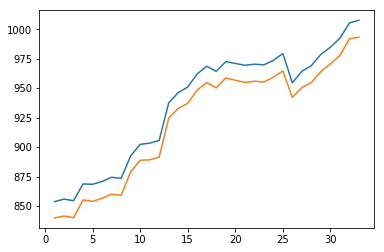

In [38]:
import matplotlib.pyplot as plt

t = np.arange(1,len(y_predict)+1)
plt.plot(t,forecast_set,t,y_predict)
plt.show()